# Telecom Customer Churn Prediction Analysis

# 1. Business Understanding

**Business Problem**

A telecommunications company is facing challenges with customer retention. The company loses revenue when customers discontinue their service ("churn"). By identifying which customers are likely to churn, the company can proactively implement targeted retention strategies to reduce churn rate and maintain revenue.

**Stakeholder**

The primary stakeholders are the telecom company's customer retention team and marketing department, who need to know:

*  Which customers are at high risk of churning
*  What factors contribute most to customer churn
*  What interventions might be most effective to retain at-risk customers

**Objective**
Build a classification model that can:

*  Accurately predict which customers are likely to churn
*  Identify the key factors that influence customer churn
*  Provide actionable insights to reduce customer churn

**Success Metrics**

*  Primary metric: Recall (to capture as many potential churners as possible)
*  Secondary metrics: Accuracy, precision, and F1-score
*  ROC-AUC for model comparison

# 2. Data Understanding

**Data Source**

The dataset used is "Churn in Telecoms" which contains information about telecom customers and whether they churned or not from https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data.

In [2]:
# Import necessary libraries
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import warnings
import os
warnings.filterwarnings('ignore')

# Set the style for the visualizations
plt.style.use('seaborn-v0_8')

# Download the dataset
path = kagglehub.dataset_download("becksddf/churn-in-telecoms-dataset")

# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

# Read the first CSV file (if it exists)
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, file))
        print(f"Preview of {file}:")
        break
df.head(10)

Files in dataset: ['bigml_59c28831336c6604c800002a.csv']
Preview of bigml_59c28831336c6604c800002a.csv:


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


Data Exploration

In [3]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (3333, 21)


In [4]:
# Check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Check summary statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


Distribution of churn:
churn
False    2850
True      483
Name: count, dtype: int64
Churn rate: 14.49%


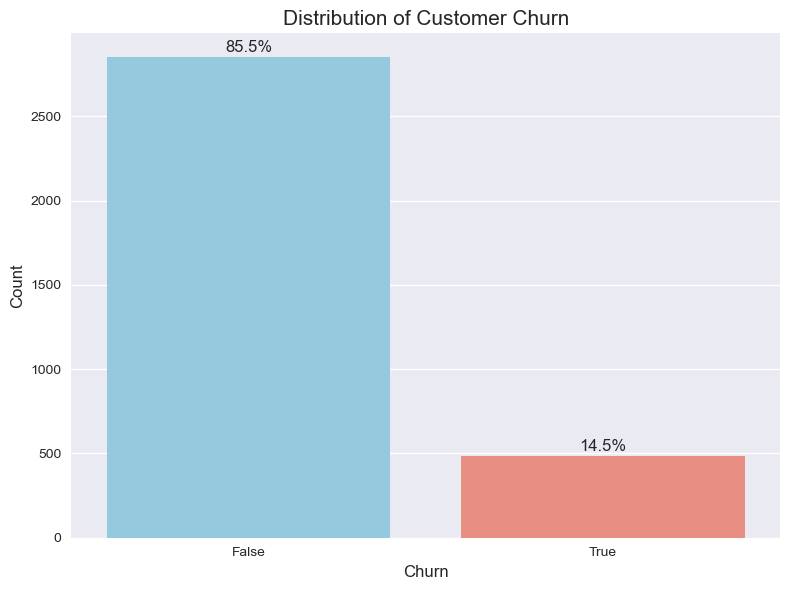

In [7]:
# Check the distribution of the target variable
print("Distribution of churn:")
print(df['churn'].value_counts())
print(f"Churn rate: {df['churn'].mean()*100:.2f}%")

# Visualize the distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribution of Customer Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentages on top of bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 30
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

#Exploratory Data Analysis


Categorical Features Analysis

Categorical columns: ['state', 'phone number', 'international plan', 'voice mail plan', 'churn']


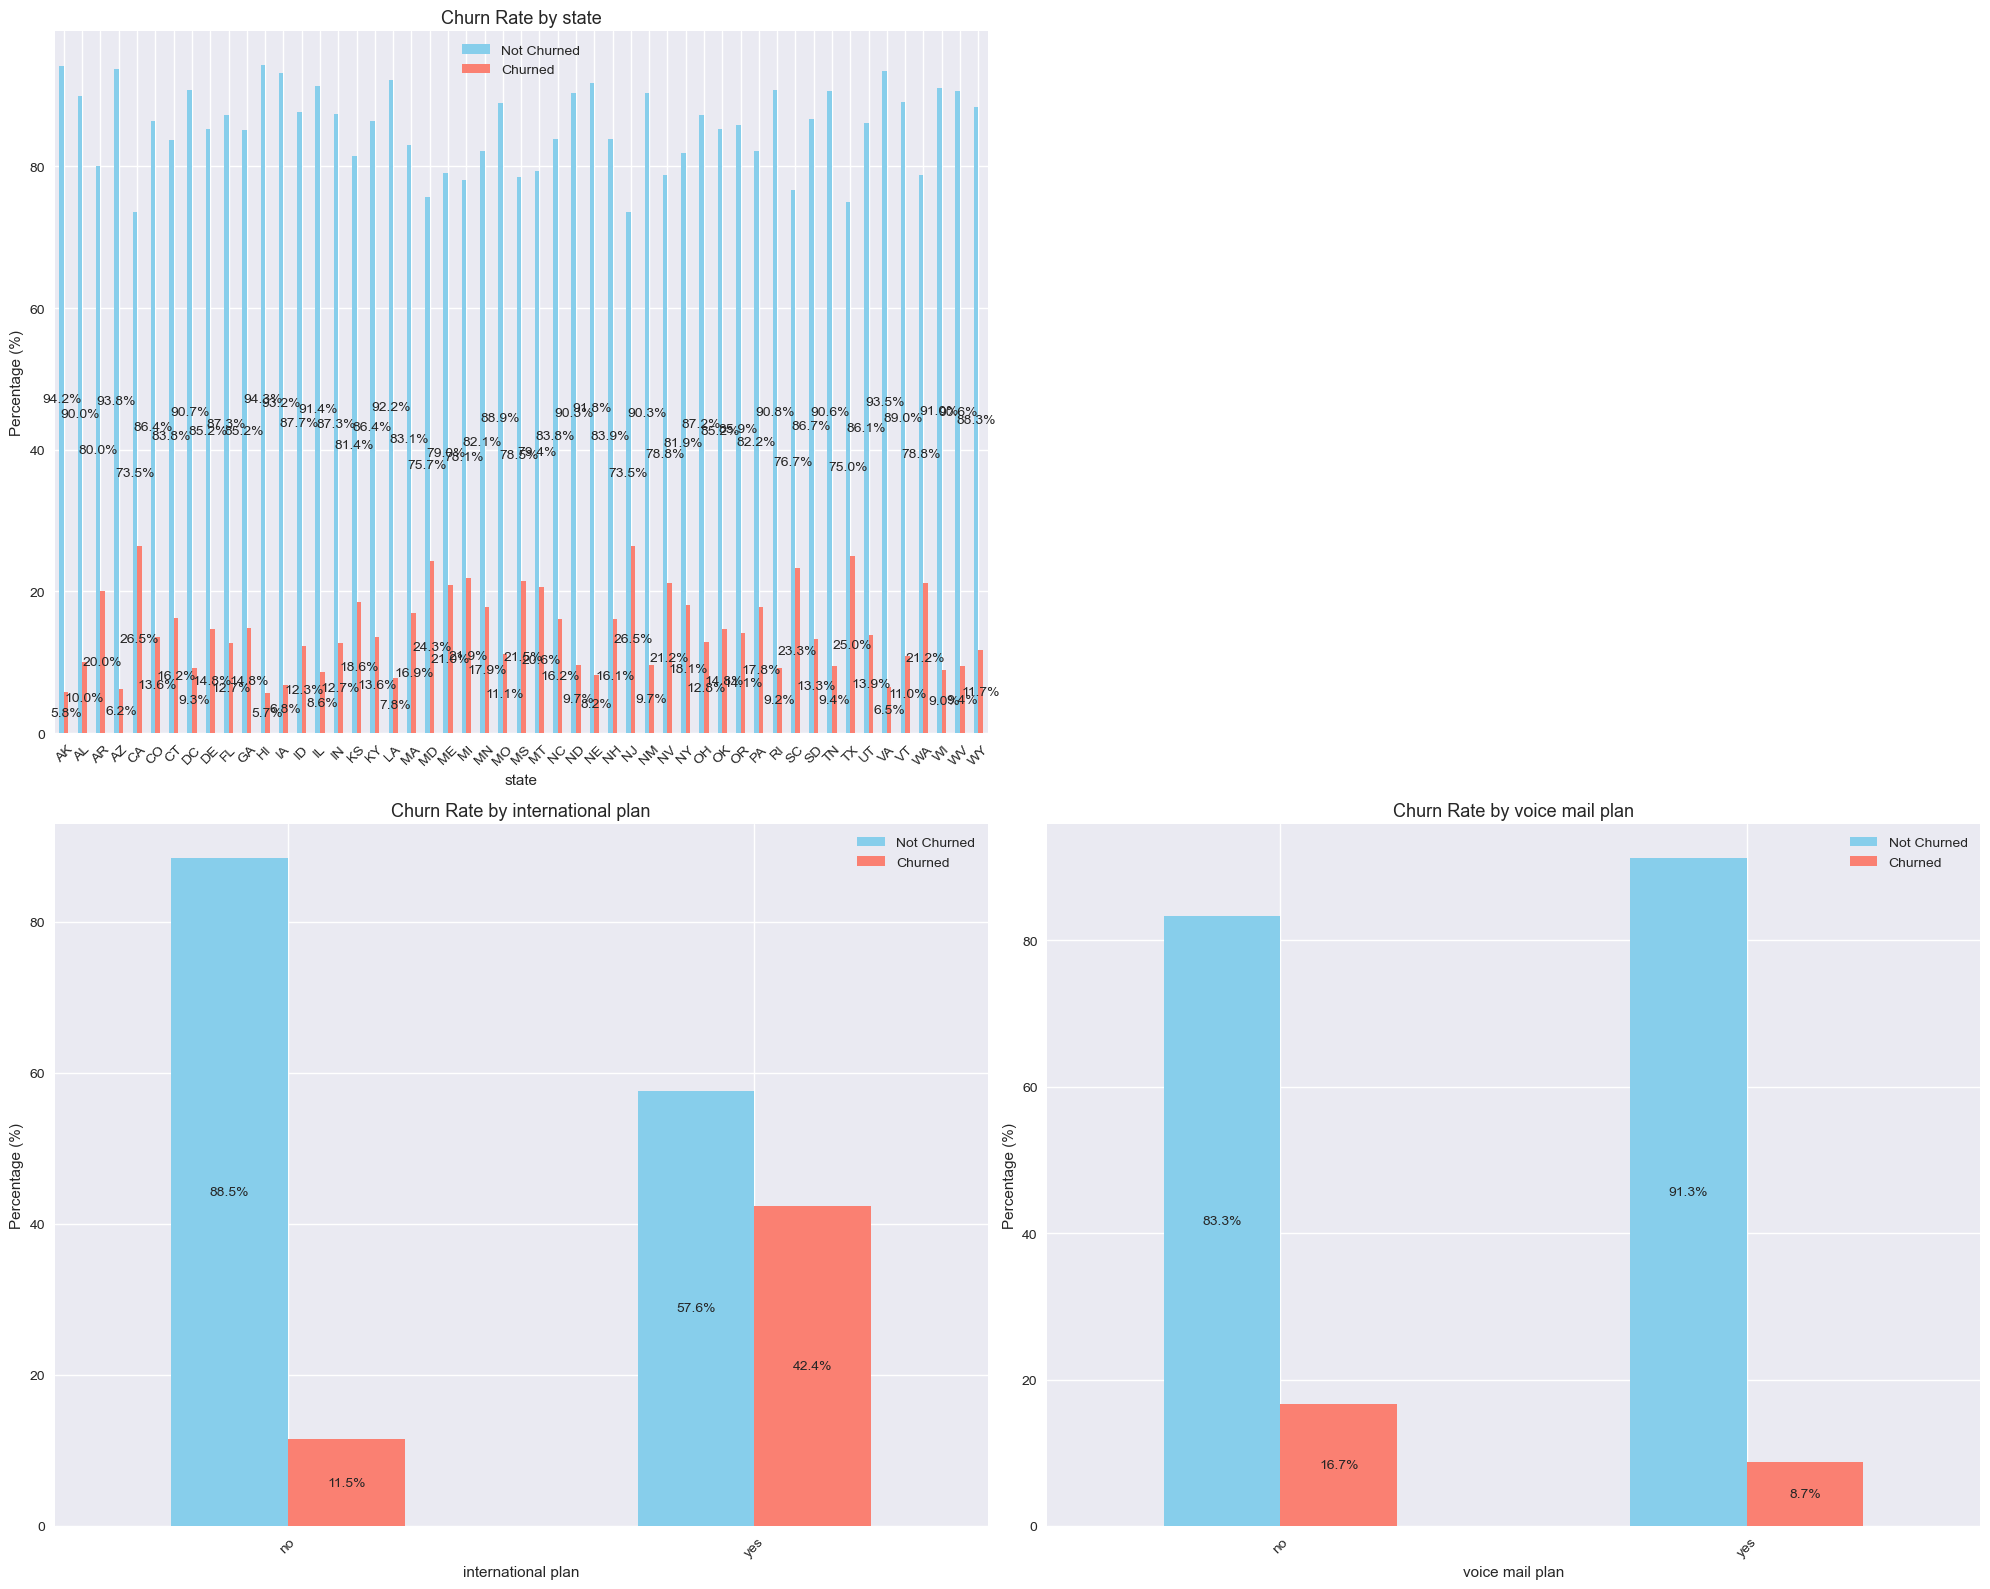

In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Create plots for categorical features vs churn
plt.figure(figsize=(20, 16))

for i, col in enumerate(categorical_cols):
    if col != 'churn' and col != 'phone number':  # Exclude the target and phone number
        plt.subplot(2, 2, i + 1)

        # Calculate percentages
        temp_df = pd.crosstab(df[col], df['churn'], normalize='index') * 100
        temp_df.plot(kind='bar', stacked=False, ax=plt.gca(), color=['skyblue', 'salmon'])

        plt.title(f'Churn Rate by {col}', fontsize=13)
        plt.xlabel(col, fontsize=11)
        plt.ylabel('Percentage (%)', fontsize=11)
        plt.xticks(rotation=45)
        plt.legend(['Not Churned', 'Churned'])

        # Add percentage labels
        for p in plt.gca().patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            if height > 5:  # Only show labels for segments > 5%
                plt.gca().annotate(f'{height:.1f}%', (x + width/2, y + height/2),
                           ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Numerical Features Analysis

Numerical columns: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


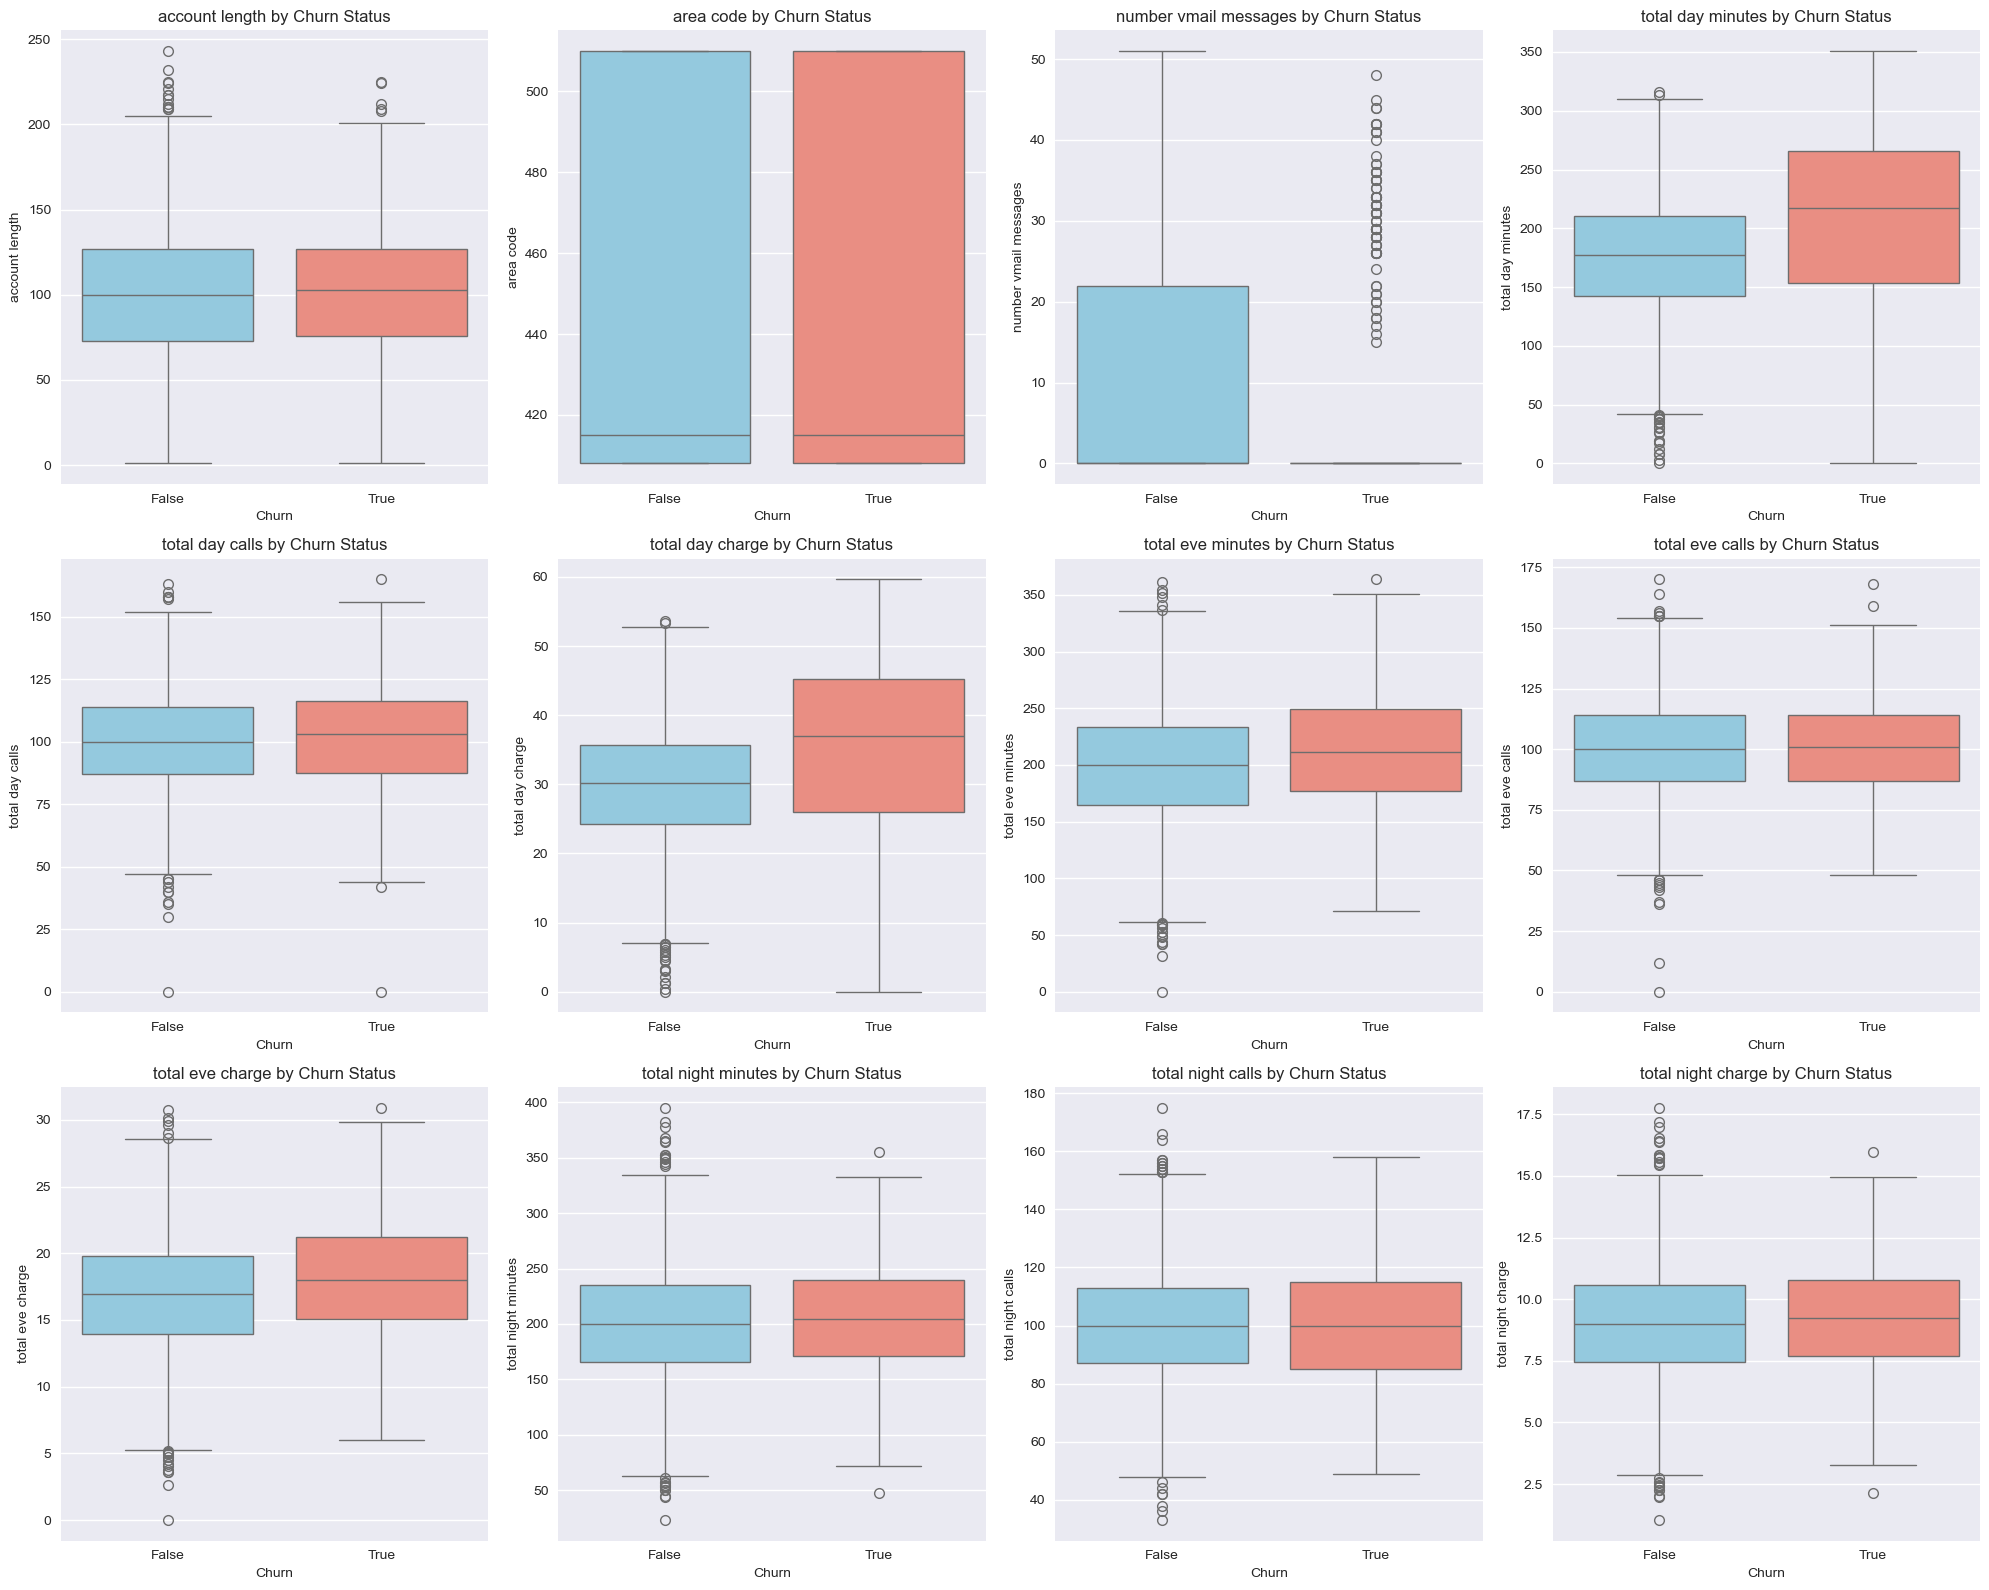

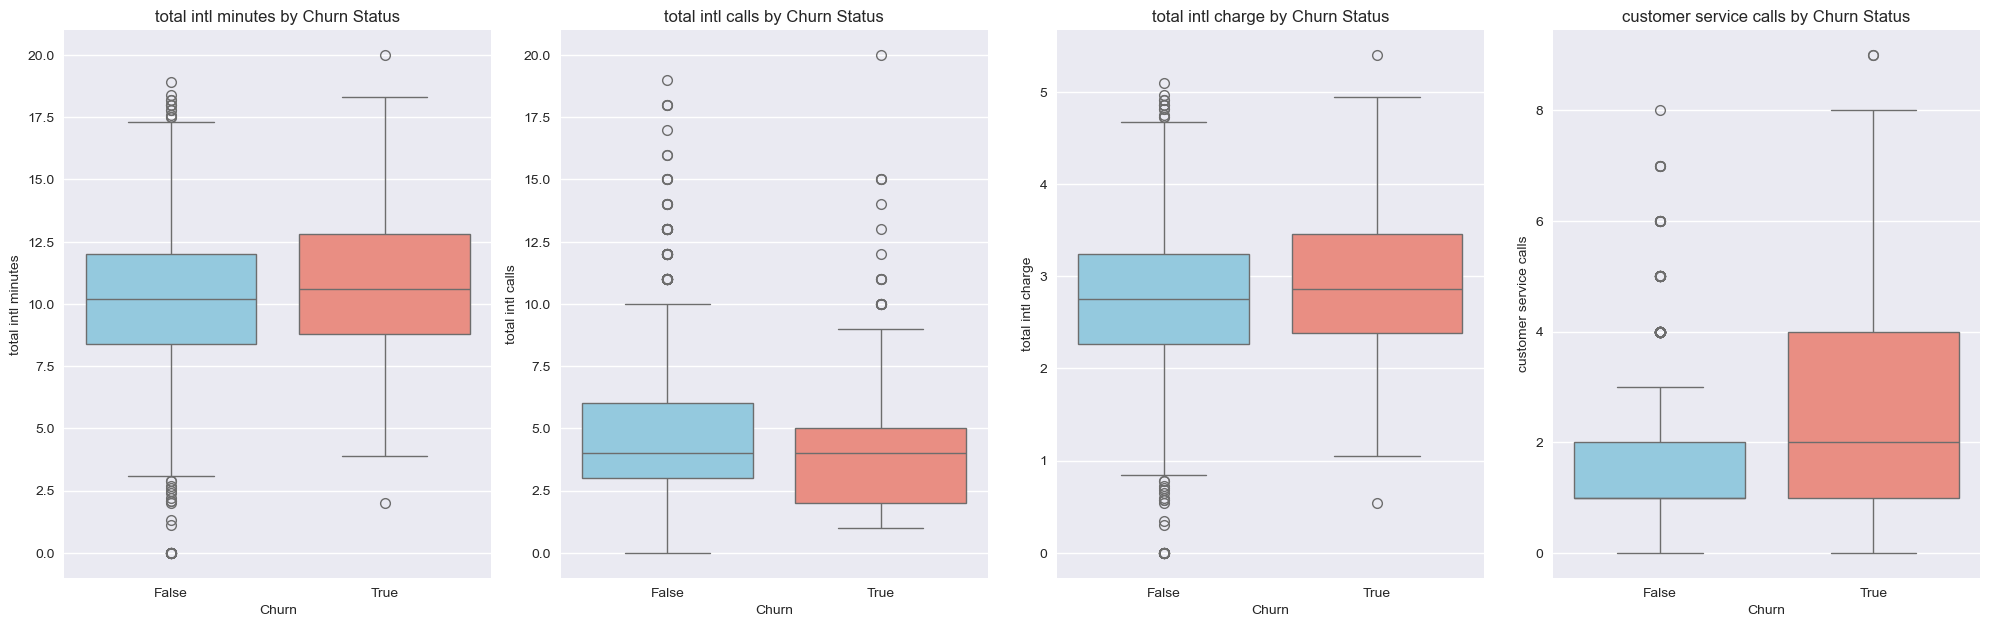

In [9]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Distribution of numerical features by churn status
plt.figure(figsize=(20, 16))

for i, col in enumerate(numerical_cols):
    if i < 12:  # Plot first 12 numerical features
        plt.subplot(3, 4, i+1)
        sns.boxplot(x='churn', y=col, data=df, palette=['skyblue', 'salmon'])
        plt.title(f'{col} by Churn Status', fontsize=12)
        plt.xlabel('Churn', fontsize=10)
        plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

# Plot remaining numerical features
if len(numerical_cols) > 12:
    plt.figure(figsize=(20, 12))
    for i, col in enumerate(numerical_cols[12:]):
        plt.subplot(2, 4, i+1)
        sns.boxplot(x='churn', y=col, data=df, palette=['skyblue', 'salmon'])
        plt.title(f'{col} by Churn Status', fontsize=12)
        plt.xlabel('Churn', fontsize=10)
        plt.ylabel(col, fontsize=10)

    plt.tight_layout()
    plt.show()

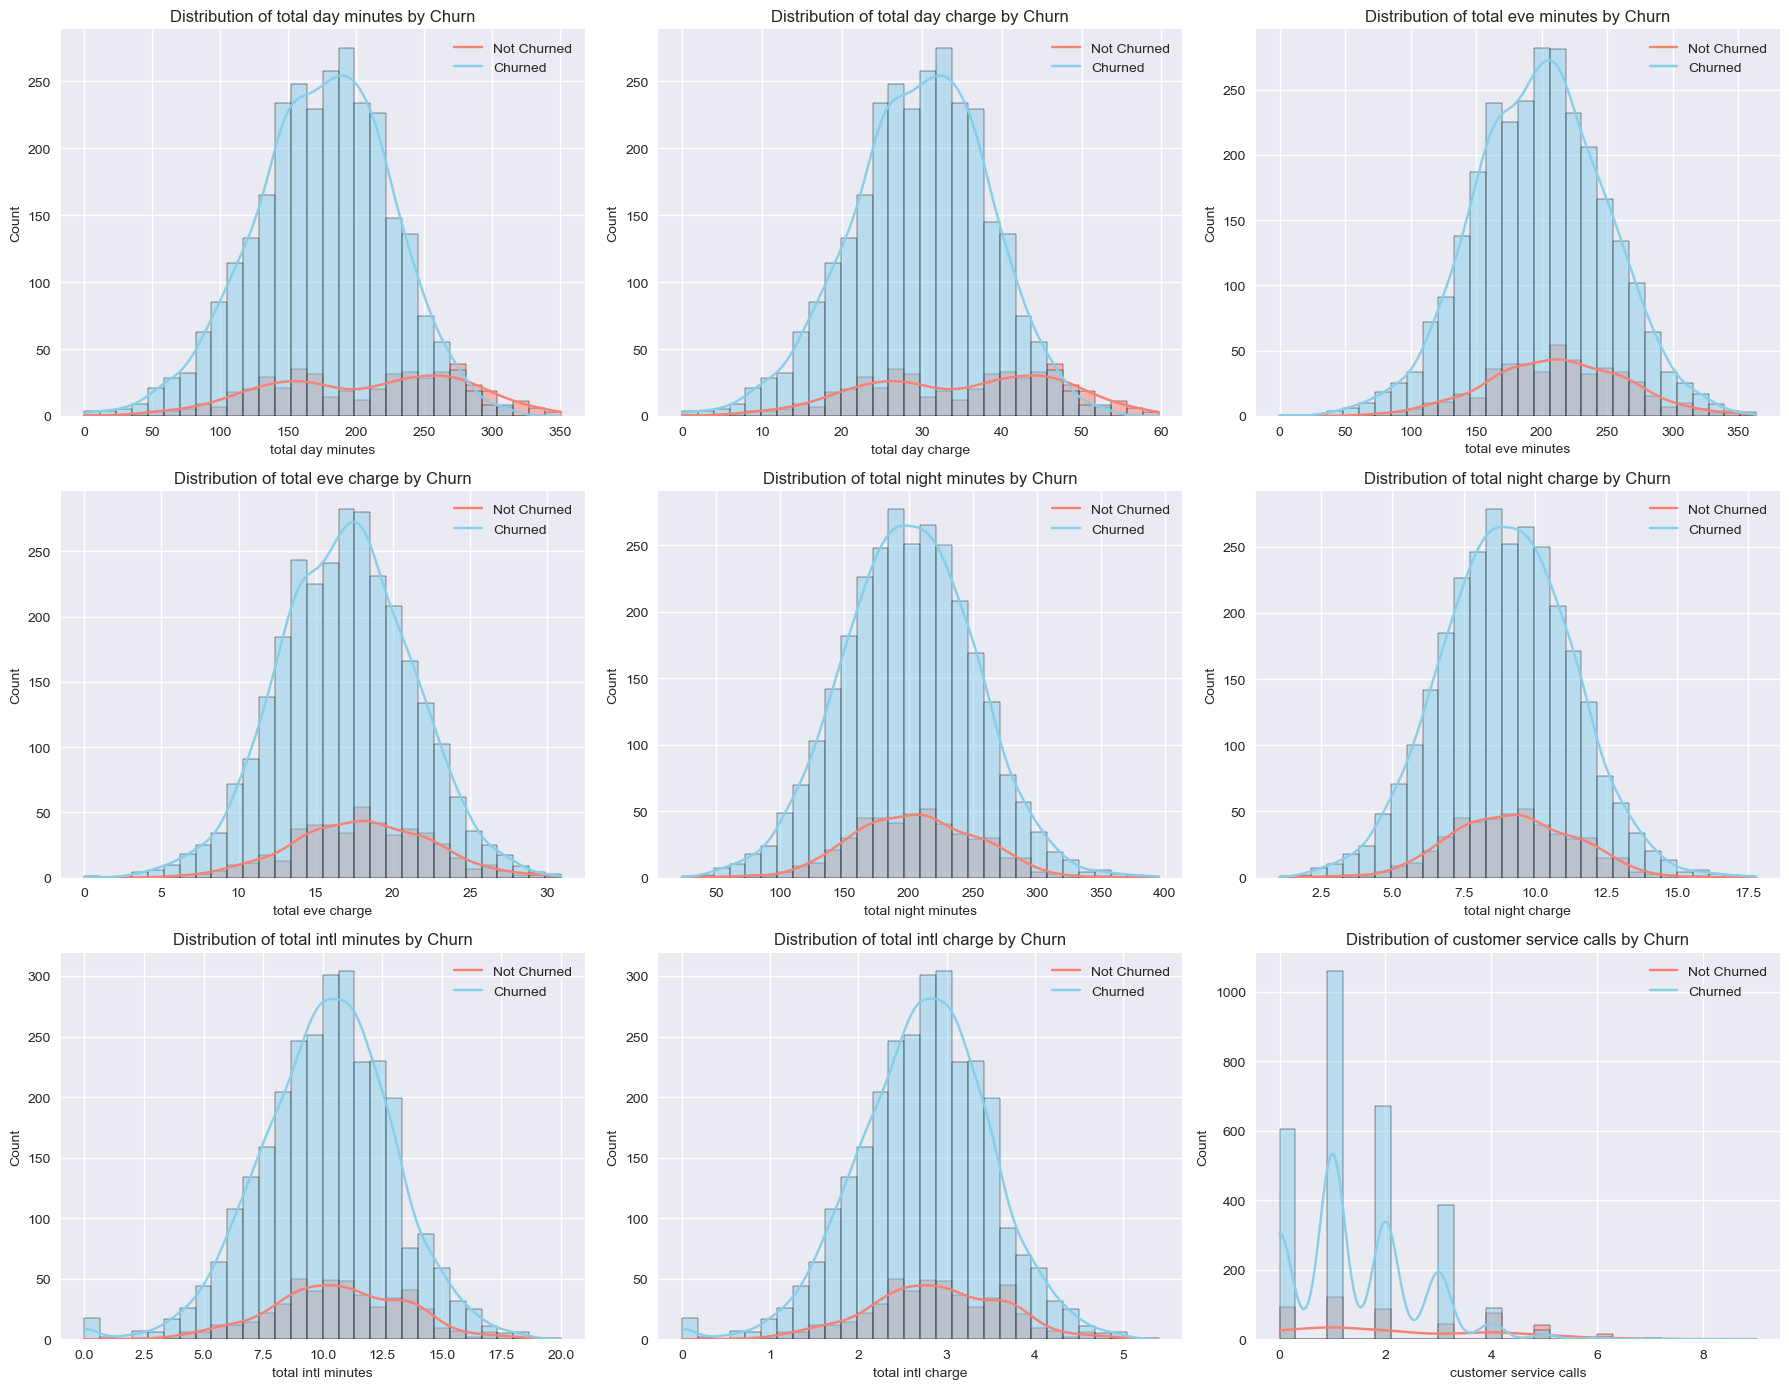

In [10]:
# Create histograms to see the distribution of important numerical features
plt.figure(figsize=(18, 14))

# Selected key features based on previous analysis
key_features = ['total day minutes', 'total day charge',
                'total eve minutes', 'total eve charge',
                'total night minutes', 'total night charge',
                'total intl minutes', 'total intl charge',
                'customer service calls']

for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, hue='churn', kde=True, bins=30, palette=['skyblue', 'salmon'])
    plt.title(f'Distribution of {feature} by Churn', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.legend(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

Correlation Analysis

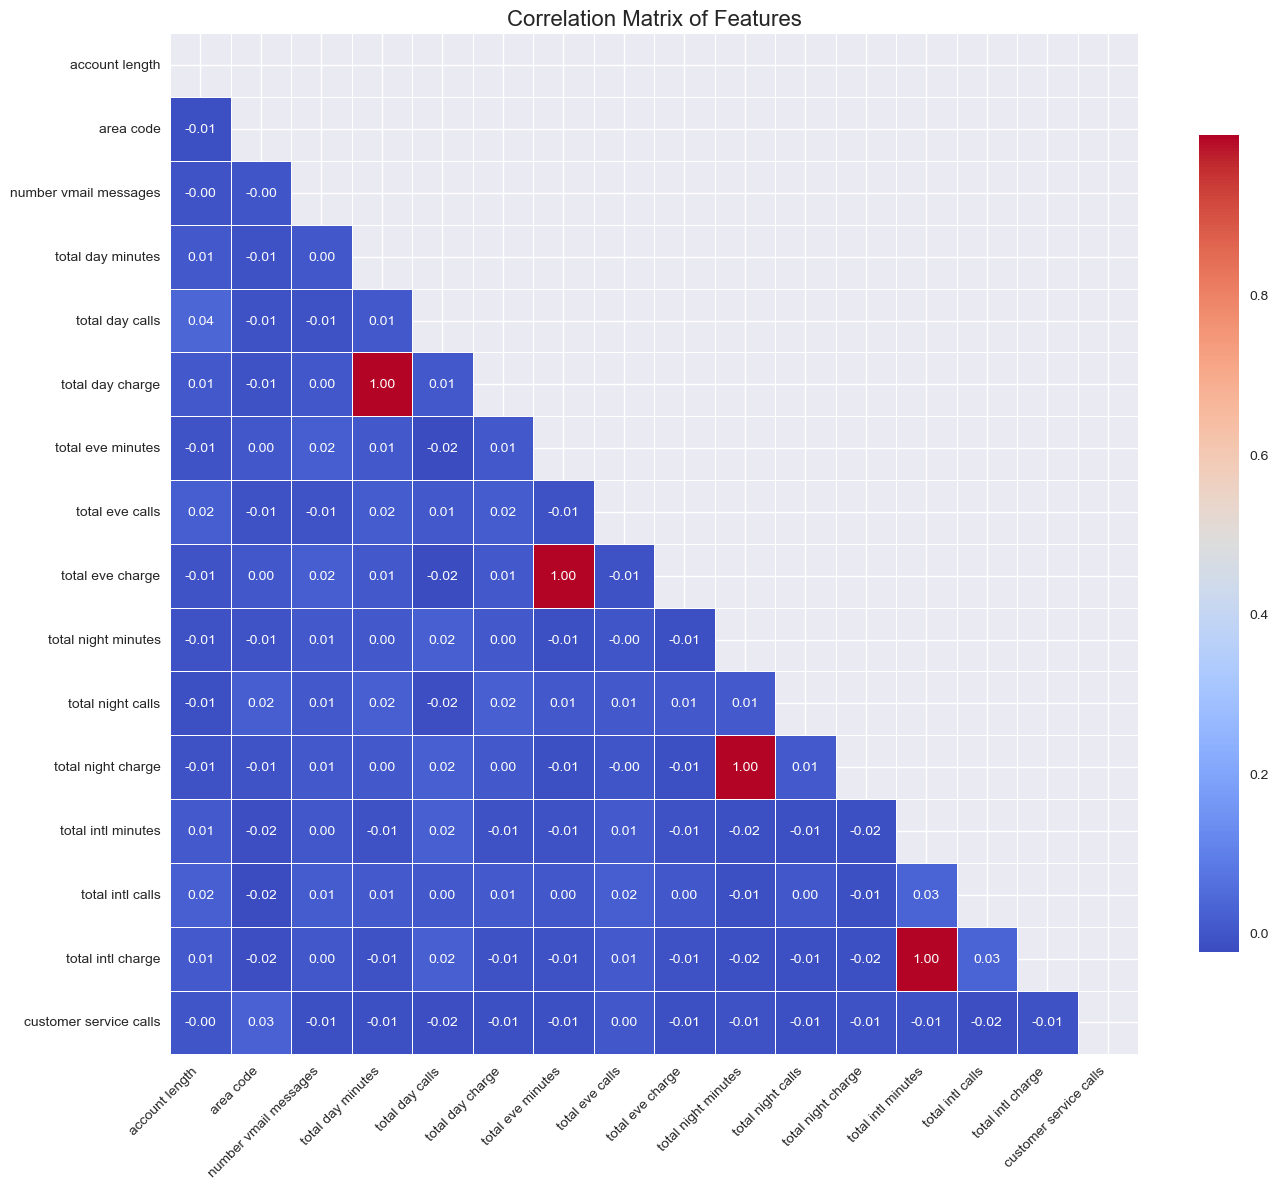

In [11]:
# Calculate correlations
corr_matrix = df.drop(columns=['state', 'phone number', 'international plan', 'voice mail plan', 'churn']).corr()

# Create heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Key Insights from Data Exploration

Based on our exploratory data analysis, we can highlight several key insights:

* Churn Rate: Approximately 14.5% of customers have churned, indicating an imbalanced classification problem.
Plan Features:

* Customers with the international plan are significantly more likely to churn.
The voice mail plan shows less impact on churn rates.


* Usage Patterns:

  *  Customers with higher day minutes and charges show higher churn rates.
International calling patterns show differences between churners and non-churners.


* Customer Service:

  * A clear relationship exists between the number of customer service calls and churn rate.
  * Customers who make more service calls are more likely to churn, suggesting potential dissatisfaction.


* Correlations:

  * Strong positive correlations exist between minutes and charges across all time periods.
  * This multicollinearity will need to be addressed in our modeling approach.
